01. What is Simple Linear Regression?
**Ans.**
Simple linear regression is a statistical method used to model the relationship between one independent variable and one dependent variable using a straight line. It aims to find the best-fitting line that describes how the dependent variable changes as the independent variable changes.

02. What are the key assumptions of Simple Linear Regression?
**Ans.**
The key assumptions of simple linear regression are linearity, independence, homoscedasticity, and normality. These assumptions ensure that the model accurately reflects the relationship between the independent and dependent variables and that the results are reliable

03. What is heteroscedasticity, and why is it important to address in regression
models?

**Ans.**
Heteroscedasticity, in regression models, refers to the situation where the variability (variance) of the error terms (residuals) is not constant across all levels of the independent variables. Essentially, the spread of the data points around the regression line is not uniform. This violates a key assumption of ordinary least squares (OLS) regression, which assumes homoscedasticity (constant variance). Addressing heteroscedasticity is crucial because it can lead to inaccurate standard errors, unreliable hypothesis tests, and inefficient parameter estimates.

04. What is Multiple Linear Regression?
**Ans**
Multiple linear regression is a statistical method that analyzes the relationship between one dependent variable and two or more independent variables. It aims to find the best-fitting linear equation that predicts the dependent variable based on the values of the independent variables. Essentially, it's an extension of simple linear regression, allowing for more than one predictor in the model.

05. What is polynomial regression, and how does it differ from linear
regression?
**Ans.**
Polynomial regression models non-linear relationships by fitting a polynomial equation to the data, while linear regression models linear relationships with a straight line. Essentially, polynomial regression can capture curves and bends in the data that linear regression cannot, though it introduces the risk of overfitting if not used carefully


06.


In [1]:

#06 Implement a Python program to fit a Simple Linear Regression model to
#the following sample data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
#Plot the regression line over the data points.

Slope (Coefficient): 1.9800
Intercept: 0.1800


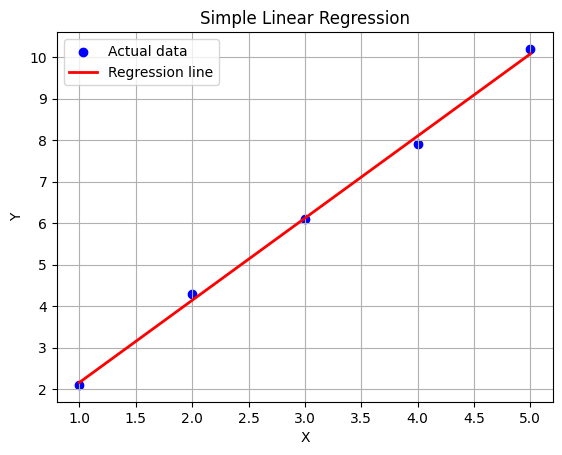

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Reshape for sklearn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and train the model
model = LinearRegression()
model.fit(X, Y)

# Predict values
Y_pred = model.predict(X)

# Print model parameters
print(f"Slope (Coefficient): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Plot data points and regression line
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# 07.  Fit a Multiple Linear Regression model on this sample data:
#● Area = [1200, 1500, 1800, 2000]
#● Rooms = [2, 3, 3, 4]
#● Price = [250000, 300000, 320000, 370000]
#Check for multicollinearity using VIF and report the results.


In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Features (X) and Target (Y)
X = df[['Area', 'Rooms']]
Y = df['Price']

# Add constant for statsmodels
X_const = sm.add_constant(X)

# Fit Multiple Linear Regression model
model = sm.OLS(Y, X_const).fit()

# Print model summary
print(model.summary())

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

# Print VIF results
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Mon, 28 Jul 2025   Prob (F-statistic):             0.0377
Time:                        18:15:17   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [5]:
# 08.Implement polynomial regression on the following data:
#● X = [1, 2, 3, 4, 5]
#● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
#Fit a 2nd-degree polynomial and plot the resulting curve.

Model coefficients: [0.   1.94 0.2 ]
Model intercept: 0.0600


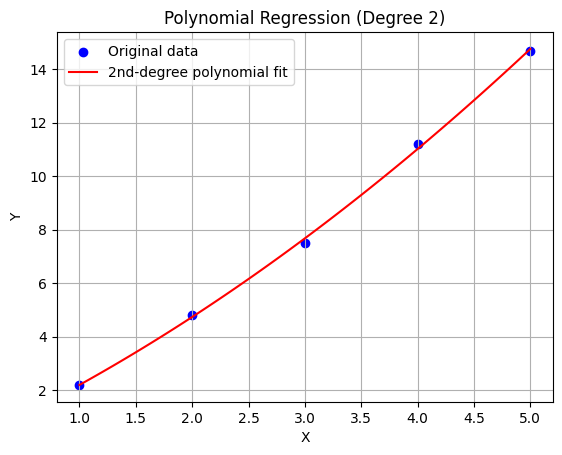

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform features to polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict values using the model
X_range = np.linspace(1, 5, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
Y_pred = model.predict(X_range_poly)

# Print model coefficients
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_:.4f}")

# Plot original data and regression curve
plt.scatter(X, Y, color='blue', label='Original data')
plt.plot(X_range, Y_pred, color='red', label='2nd-degree polynomial fit')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# 09. Create a residuals plot for a regression model trained on this data:
#● X = [10, 20, 30, 40, 50]
#● Y = [15, 35, 40, 50, 65]
#Assess heteroscedasticity by examining the spread of residuals.


Slope: 1.1500
Intercept: 6.5000


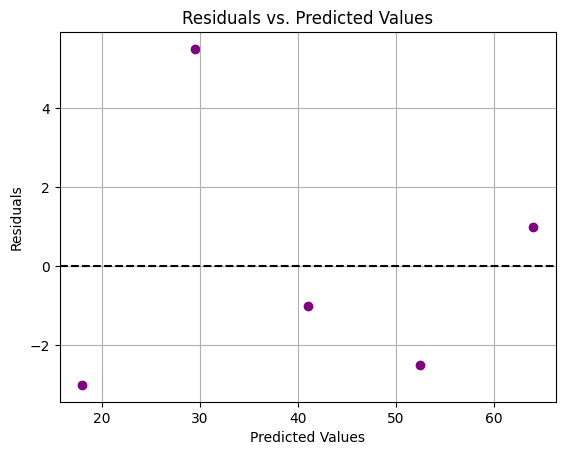

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit linear regression model
model = LinearRegression()
model.fit(X, Y)

# Predict Y values and calculate residuals
Y_pred = model.predict(X)
residuals = Y - Y_pred

# Print regression coefficients
print(f"Slope: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Residuals plot
plt.scatter(Y_pred, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


10. Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.
**aNS.**
To address heteroscedasticity and multicollinearity in a house price prediction model, I would first confirm their presence using statistical tests. Then, I would apply techniques like data transformation or regularization to mitigate these issues. If multicollinearity is severe, I might consider removing or combining correlated features. Finally, I would evaluate the model's performance on a separate test set to ensure robustness.
1. Confirming Heteroscedasticity and Multicollinearity:
Heteroscedasticity:
I'd use visual methods like scatter plots of residuals against predicted values, or statistical tests like the Breusch-Pagan test or White's test to check for non-constant variance of errors.
Multicollinearity:
I'd calculate the Variance Inflation Factor (VIF) for each feature. A high VIF (typically > 5 or 10) indicates a high degree of multicollinearity.
2. Addressing Heteroscedasticity:
Data Transformation:
Applying transformations like logarithmic or Box-Cox transformation to the target variable (house price) or predictor variables can stabilize the variance.
Weighted Least Squares (WLS):
If the pattern of heteroscedasticity is known, WLS can be used, where data points with higher variance are given less weight in the regression.
Robust Standard Errors:
Using robust standard errors, such as those produced by the Huber-White sandwich estimator, can provide more accurate estimates of standard errors in the presence of heteroscedasticity, even if the underlying model is not perfectly homoscedastic.
3. Addressing Multicollinearity:
Feature Selection:
Removing one or more of the highly correlated features can reduce multicollinearity. However, this should be done cautiously, as removing features can lead to loss of valuable information.
Feature Extraction:
Techniques like Principal Component Analysis (PCA) can be used to create new, uncorrelated features from the original set of predictors.
Regularization:
Ridge and Lasso regression are effective in handling multicollinearity by adding penalties to the model's coefficients, shrinking the coefficients of correlated variables.
Combining Correlated Features:
Creating new features by combining correlated variables (e.g., summing the areas of multiple rooms) can also reduce multicollinearity while preserving the information.
4. Model Evaluation and Robustness:
Train/Test Split:
Splitting the data into training and testing sets is crucial to evaluate the model's performance on unseen data.
Cross-Validation:
Using techniques like k-fold cross-validation can provide a more reliable estimate of the model's performance and generalization ability.
Consider Model Complexity:
Using a model with appropriate complexity (e.g., polynomial regression or a non-linear model) can help capture the underlying relationships in the data without overfitting.
By addressing heteroscedasticity and multicollinearity, and carefully evaluating the model's performance, I can build a more robust and reliable house price prediction model.
